In [2]:
import os
import sys
from glob import glob
from konlpy.tag import Mecab
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = '/etc/fonts/NanumGothicBold.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
prop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False

sys.path.insert(0, '../')
from utils import load_pickle
from load_data import load_data
from config import Config

In [6]:
fm.get_fontconfig_fonts()
font_path = '/etc/fonts/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

Text(0.5, 1.0, '가나다')

/opt/conda/lib/python3.7/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/conda/lib/python3.7/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/conda/lib/python3.7/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0

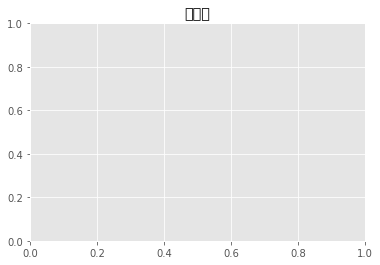

In [7]:
plt.title('가나다')

# EDA를 해봅시다
- NOTE: entity1과 entity2의 관계는 비가역

In [31]:
relations = load_pickle('../input/data/label_type.pkl')
inverse_relations = {i:j for j, i in relations.items()}

In [32]:
train_raw = load_data(Config.Train)
train_raw.head()

TRAIN_SIZE = train_raw.shape[0]
print(train_raw.shape)

(9000, 4)


In [33]:
print(f"Uniqueness for Entity 1: {train_raw['entity_01'].nunique()}")
print(f"Uniqueness for Entity 2: {train_raw['entity_02'].nunique()}")
print(f"Intersection between Entities: {len(set(train_raw['entity_01']).intersection(set(train_raw['entity_02'])))}")
print(f"Intersection Rate: {len(set(train_raw['entity_01']).intersection(set(train_raw['entity_02']))) / TRAIN_SIZE: .4f}")

Uniqueness for Entity 1: 5089
Uniqueness for Entity 2: 4474
Intersection between Entities: 694
Intersection Rate:  0.0771


In [47]:
entity1_freq = train_raw['entity_01'].value_counts().to_frame('freq').reset_index().rename({'index': 'entity'}, axis=1)

plt.bar(entity1_freq['entity'], entity1_freq['freq'], fontproperties=font_prop)

AttributeError: 'Rectangle' object has no property 'fontproperties'

In [13]:
train_raw 

8869